In [1]:
import os
import matplotlib.pyplot as plt
import utils as ul
import utils as ut
import numpy as np

In [2]:
bagfilename = "yaw_test"
csvNameList = [("mavros-imu-data.csv", True, "imu"),
               ("tracking_controller-output_data.csv", True, "output"),
               ("mavros-setpoint_raw-attitude.csv", True, "setpoint")]
dir = os.getcwd() + "/data/" + bagfilename + "/"

In [3]:
loggings = dict()
for filename in csvNameList:
    loggings[filename[2]] = ul.ProcessRosbagDataFromCSV(dir + filename[0], calcTime=filename[1])

Text(0.5, 0, 't(s)')

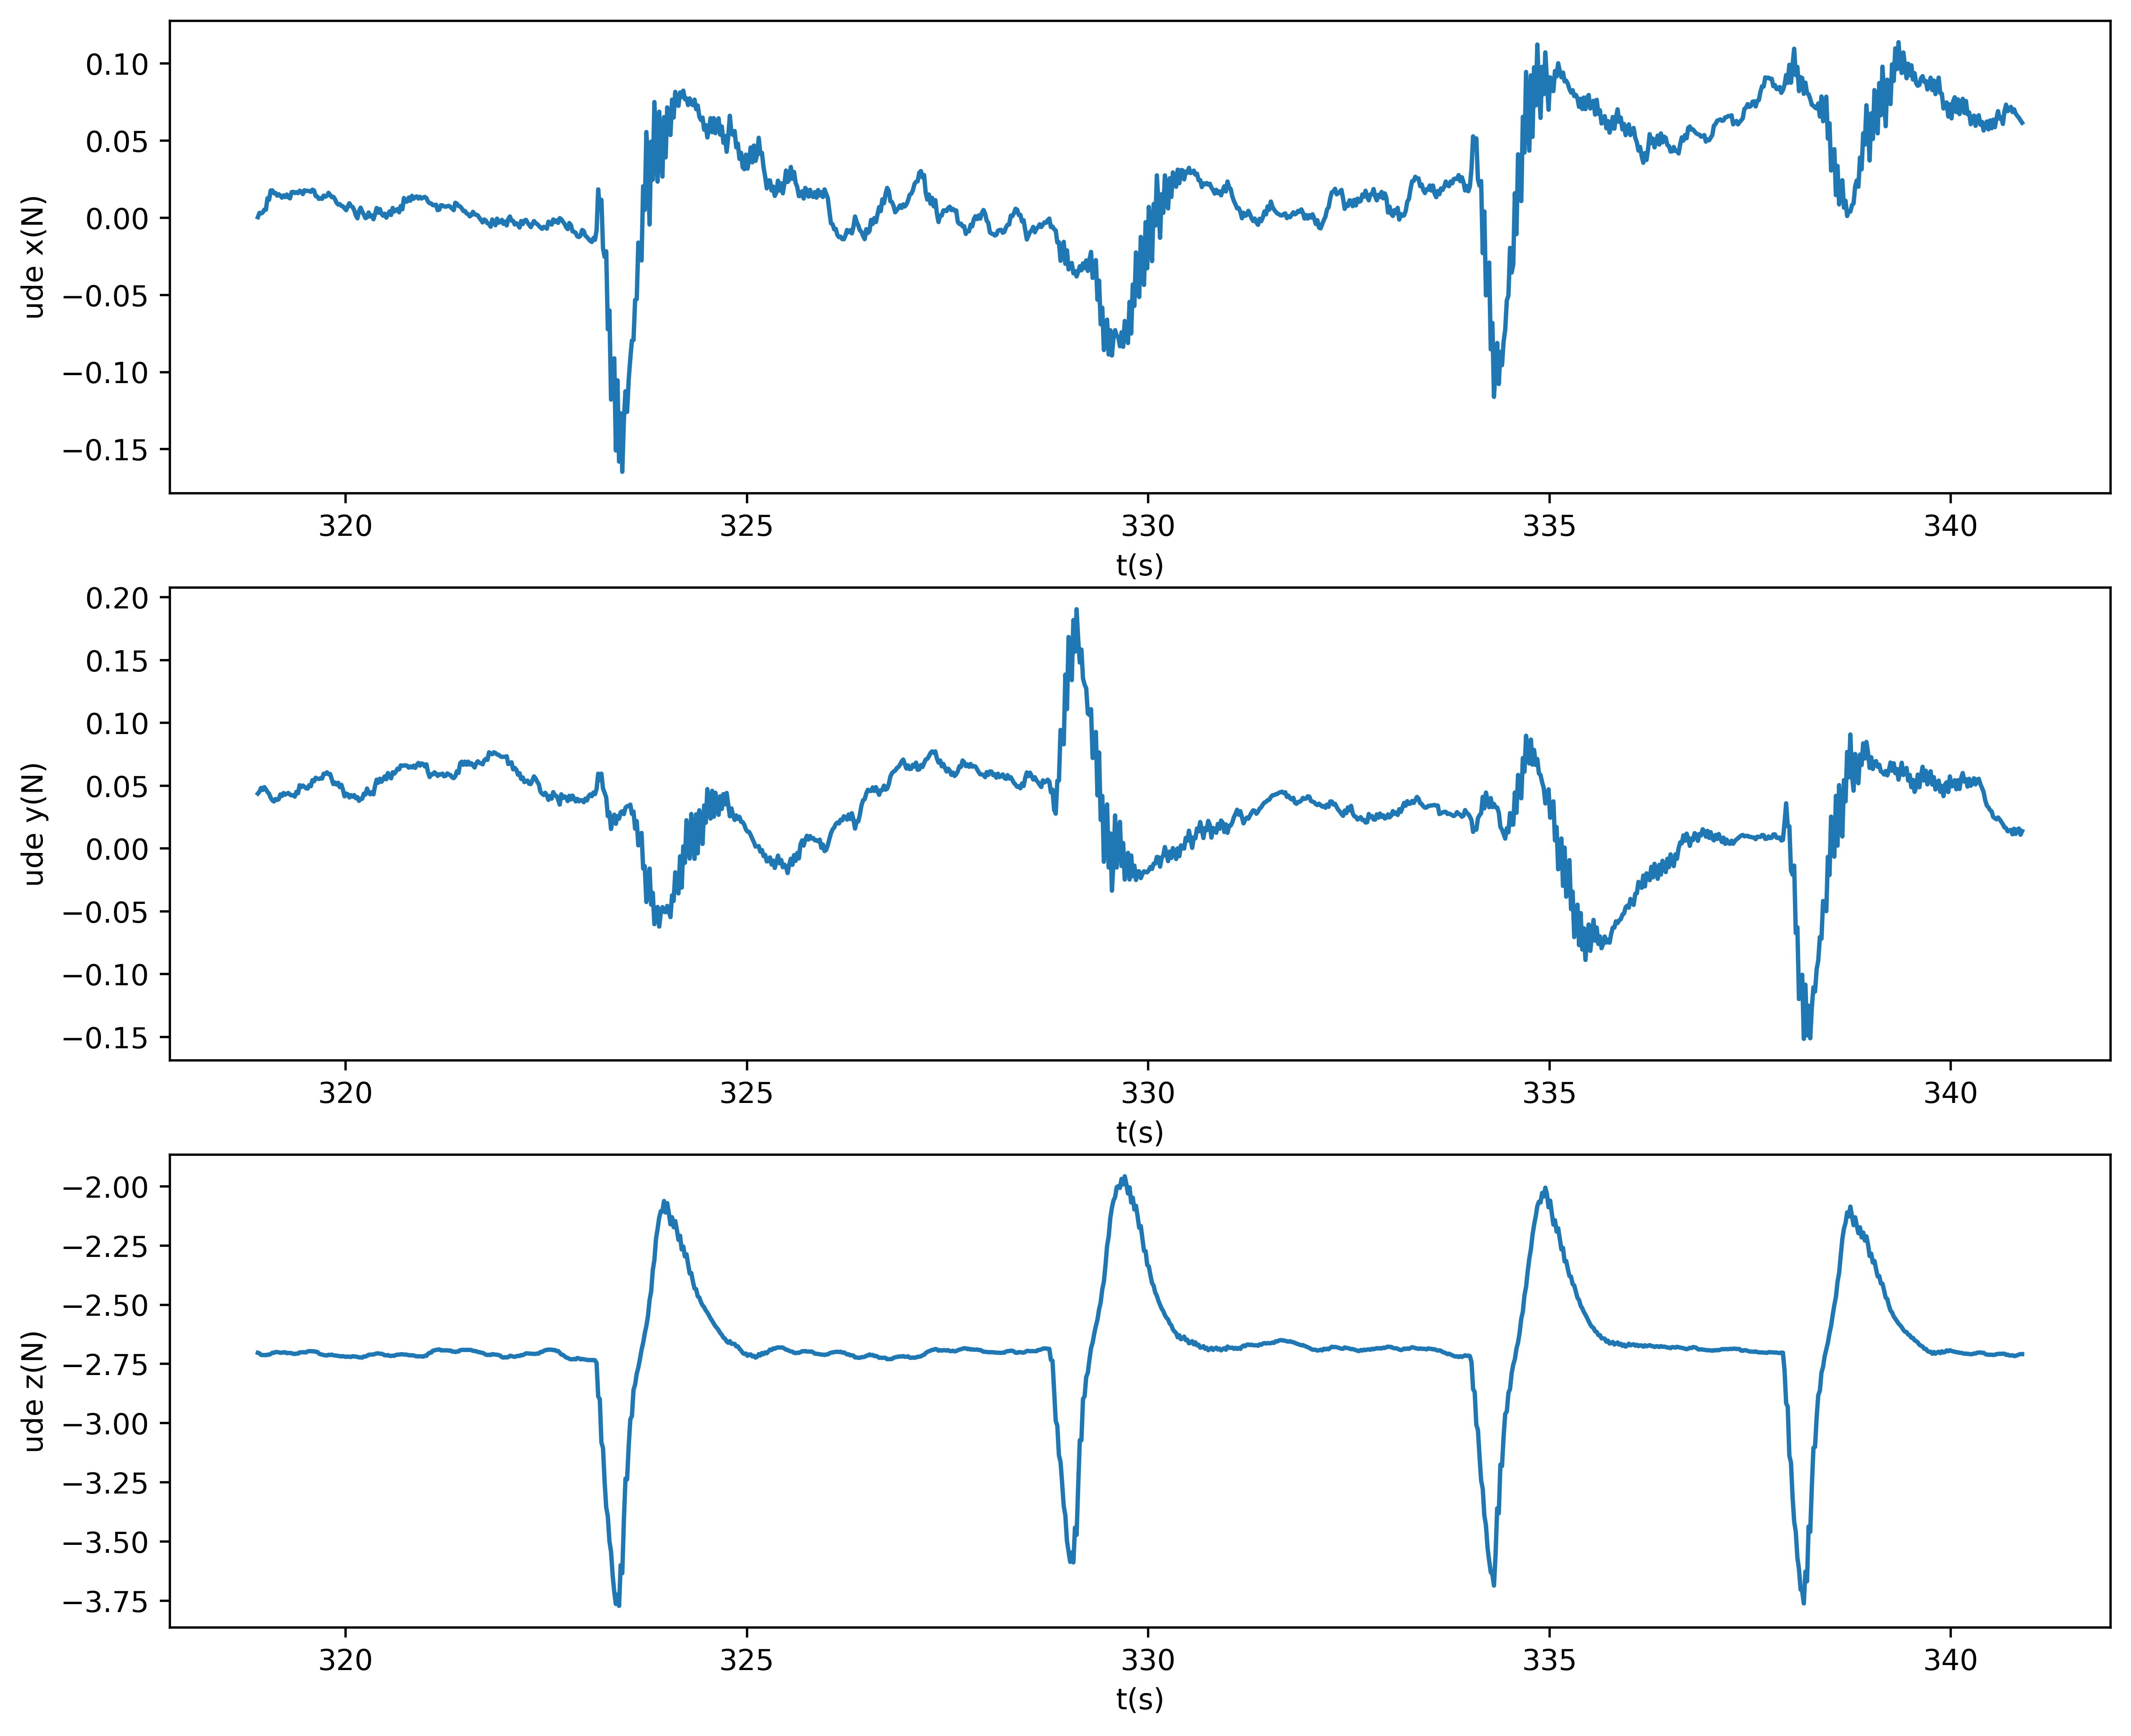

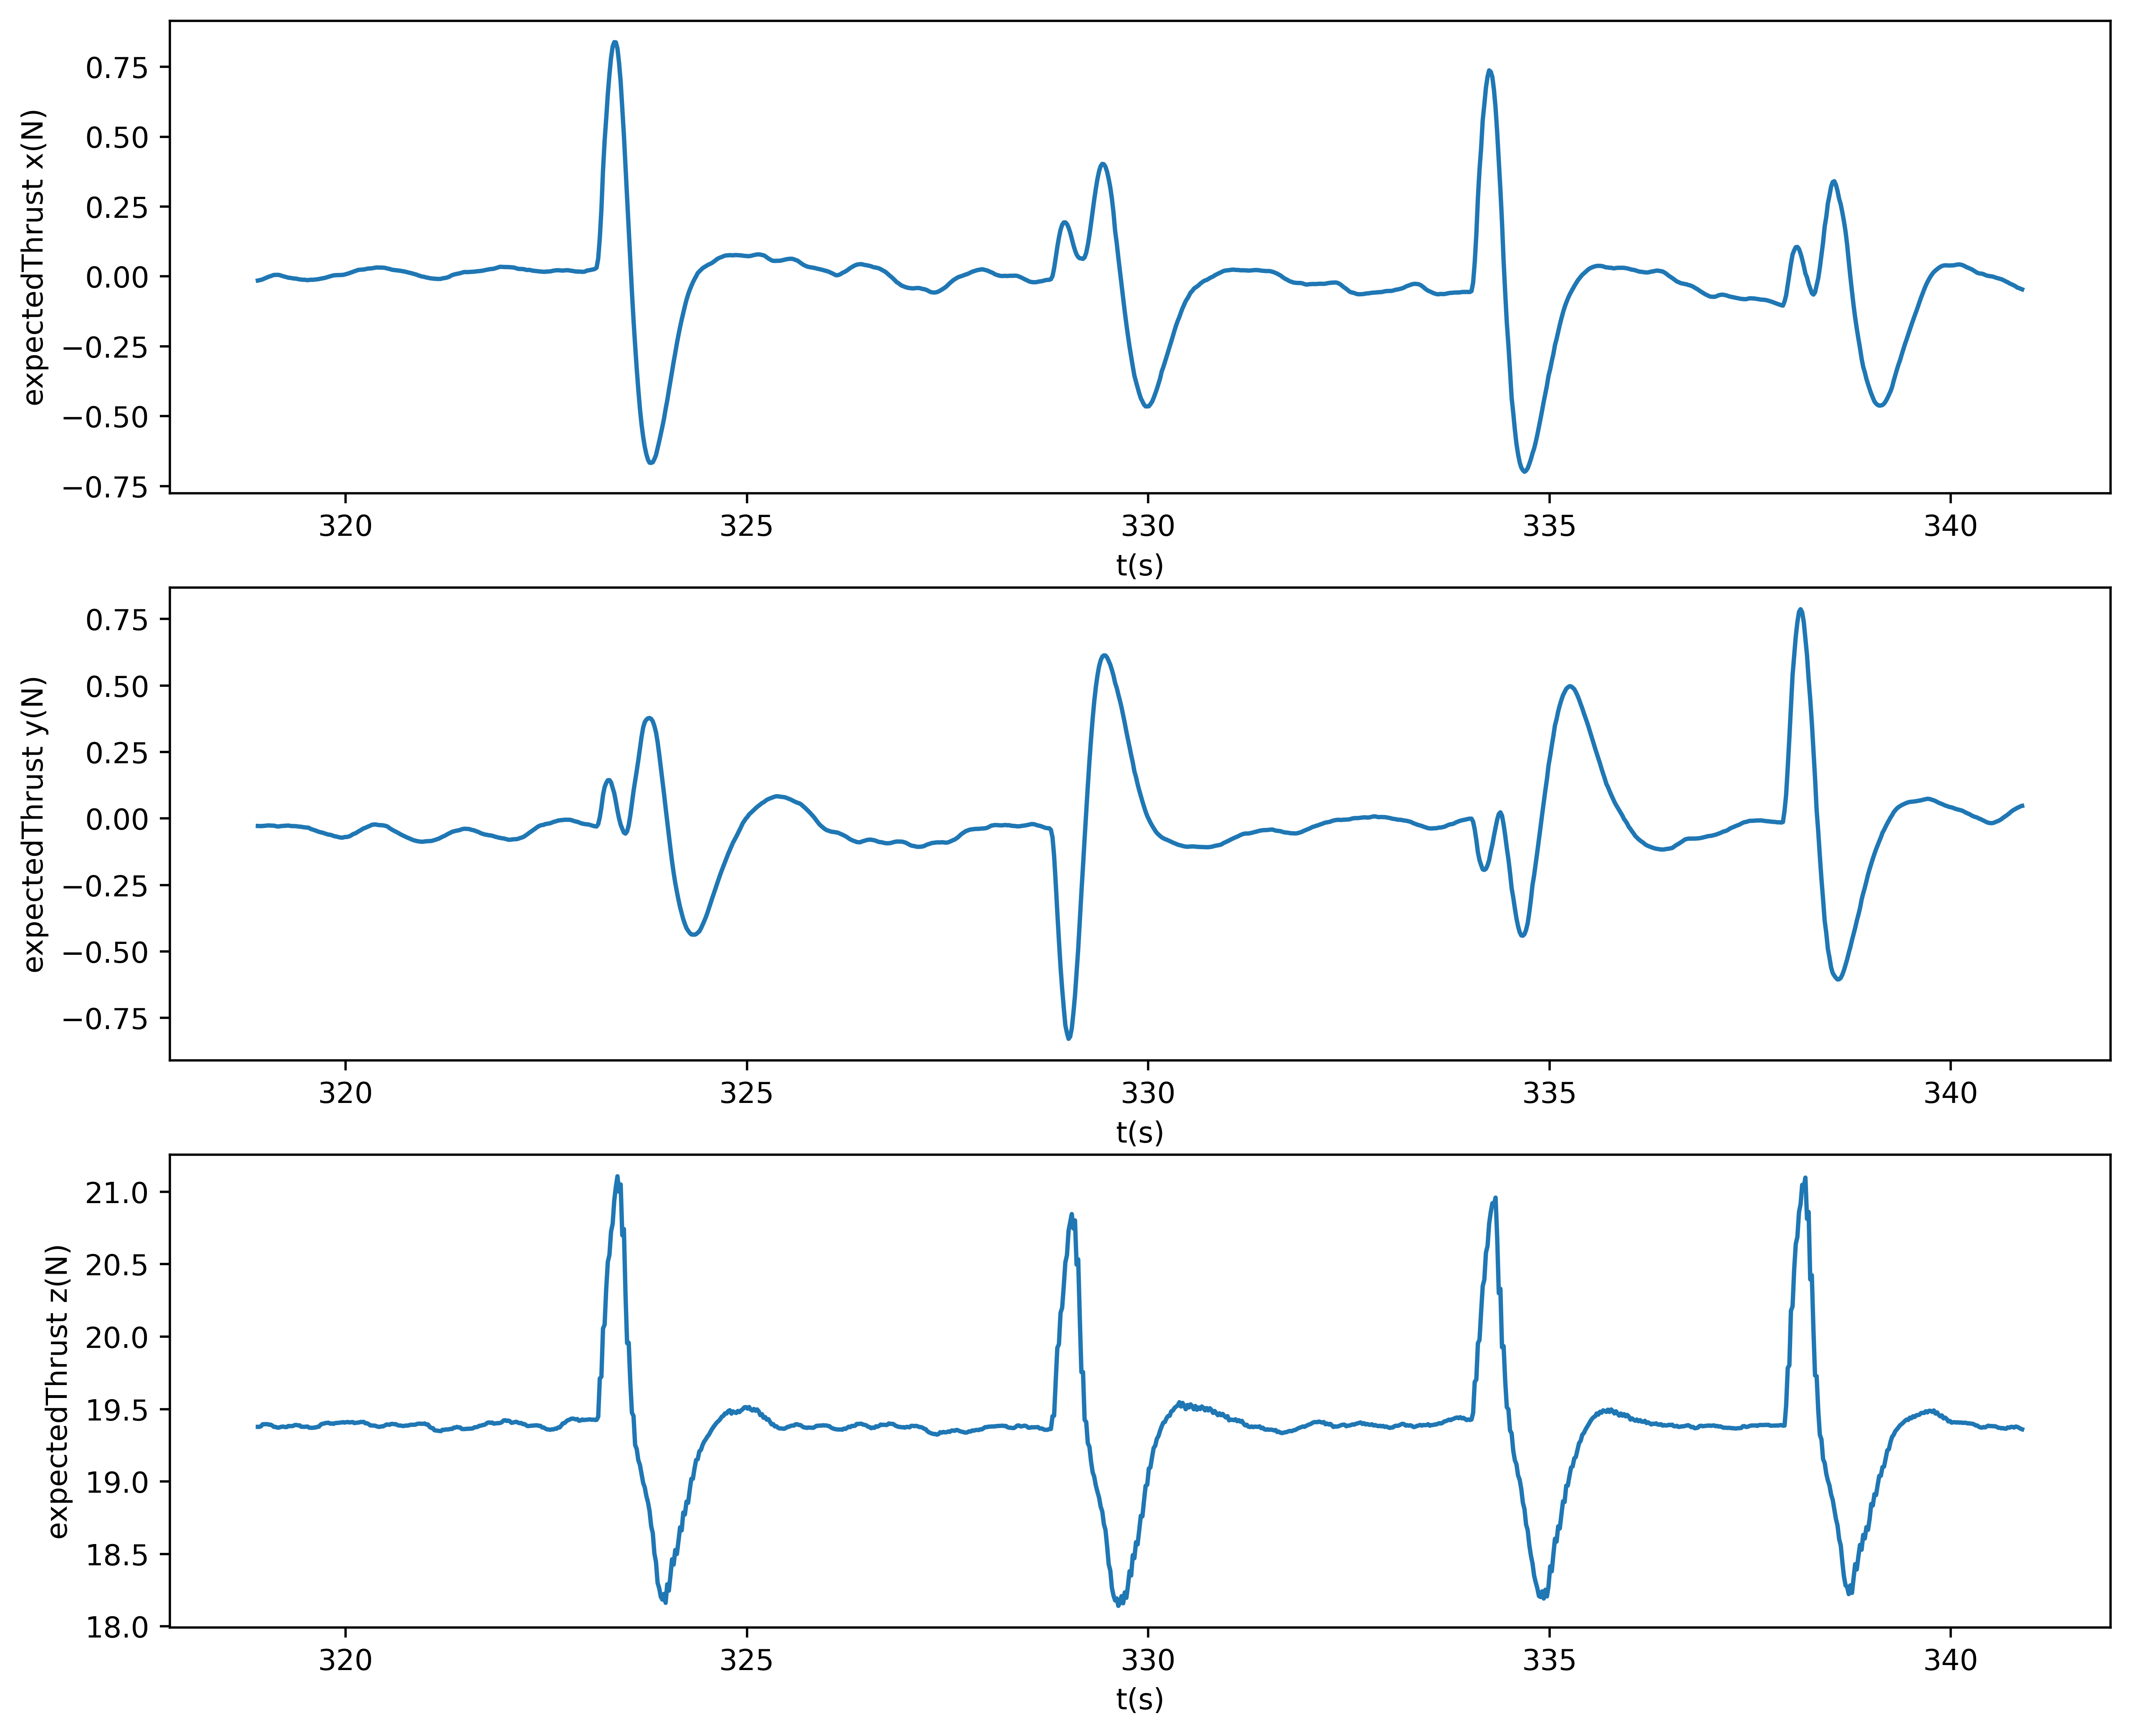

In [4]:
startIdx = 0
endIdx = 1100

plt.figure(2, figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.x'][startIdx:endIdx])
plt.ylabel('ude x(N)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.y'][startIdx:endIdx])
plt.ylabel('ude y(N)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.z'][startIdx:endIdx])
plt.ylabel('ude z(N)')
plt.xlabel('t(s)')

# plt.figure(3, figsize=(12,10), dpi= 500)
# plt.subplot(311)
# plt.plot(loggings["output"]["Time"][startIdx:endIdx], loggings["output"]['inertialForce.x'][startIdx:endIdx])
# plt.ylabel('inertial x(N)')
# plt.xlabel('t(s)')
# plt.subplot(312)
# plt.plot(loggings["output"]["Time"][startIdx:endIdx], loggings["output"]['inertialForce.y'][startIdx:endIdx])
# plt.ylabel('inertial y(N)')
# plt.xlabel('t(s)')
# plt.subplot(313)
# plt.plot(loggings["output"]["Time"][startIdx:endIdx], loggings["output"]['inertialForce.z'][startIdx:endIdx])
# plt.ylabel('inertial z(N)')
# plt.xlabel('t(s)')

plt.figure(4, figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.x'][startIdx:endIdx])
plt.ylabel('expectedThrust x(N)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.y'][startIdx:endIdx])
plt.ylabel('expectedThrust y(N)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.z'][startIdx:endIdx])
plt.ylabel('expectedThrust z(N)')
plt.xlabel('t(s)')

Text(0.5, 0, 't(s)')

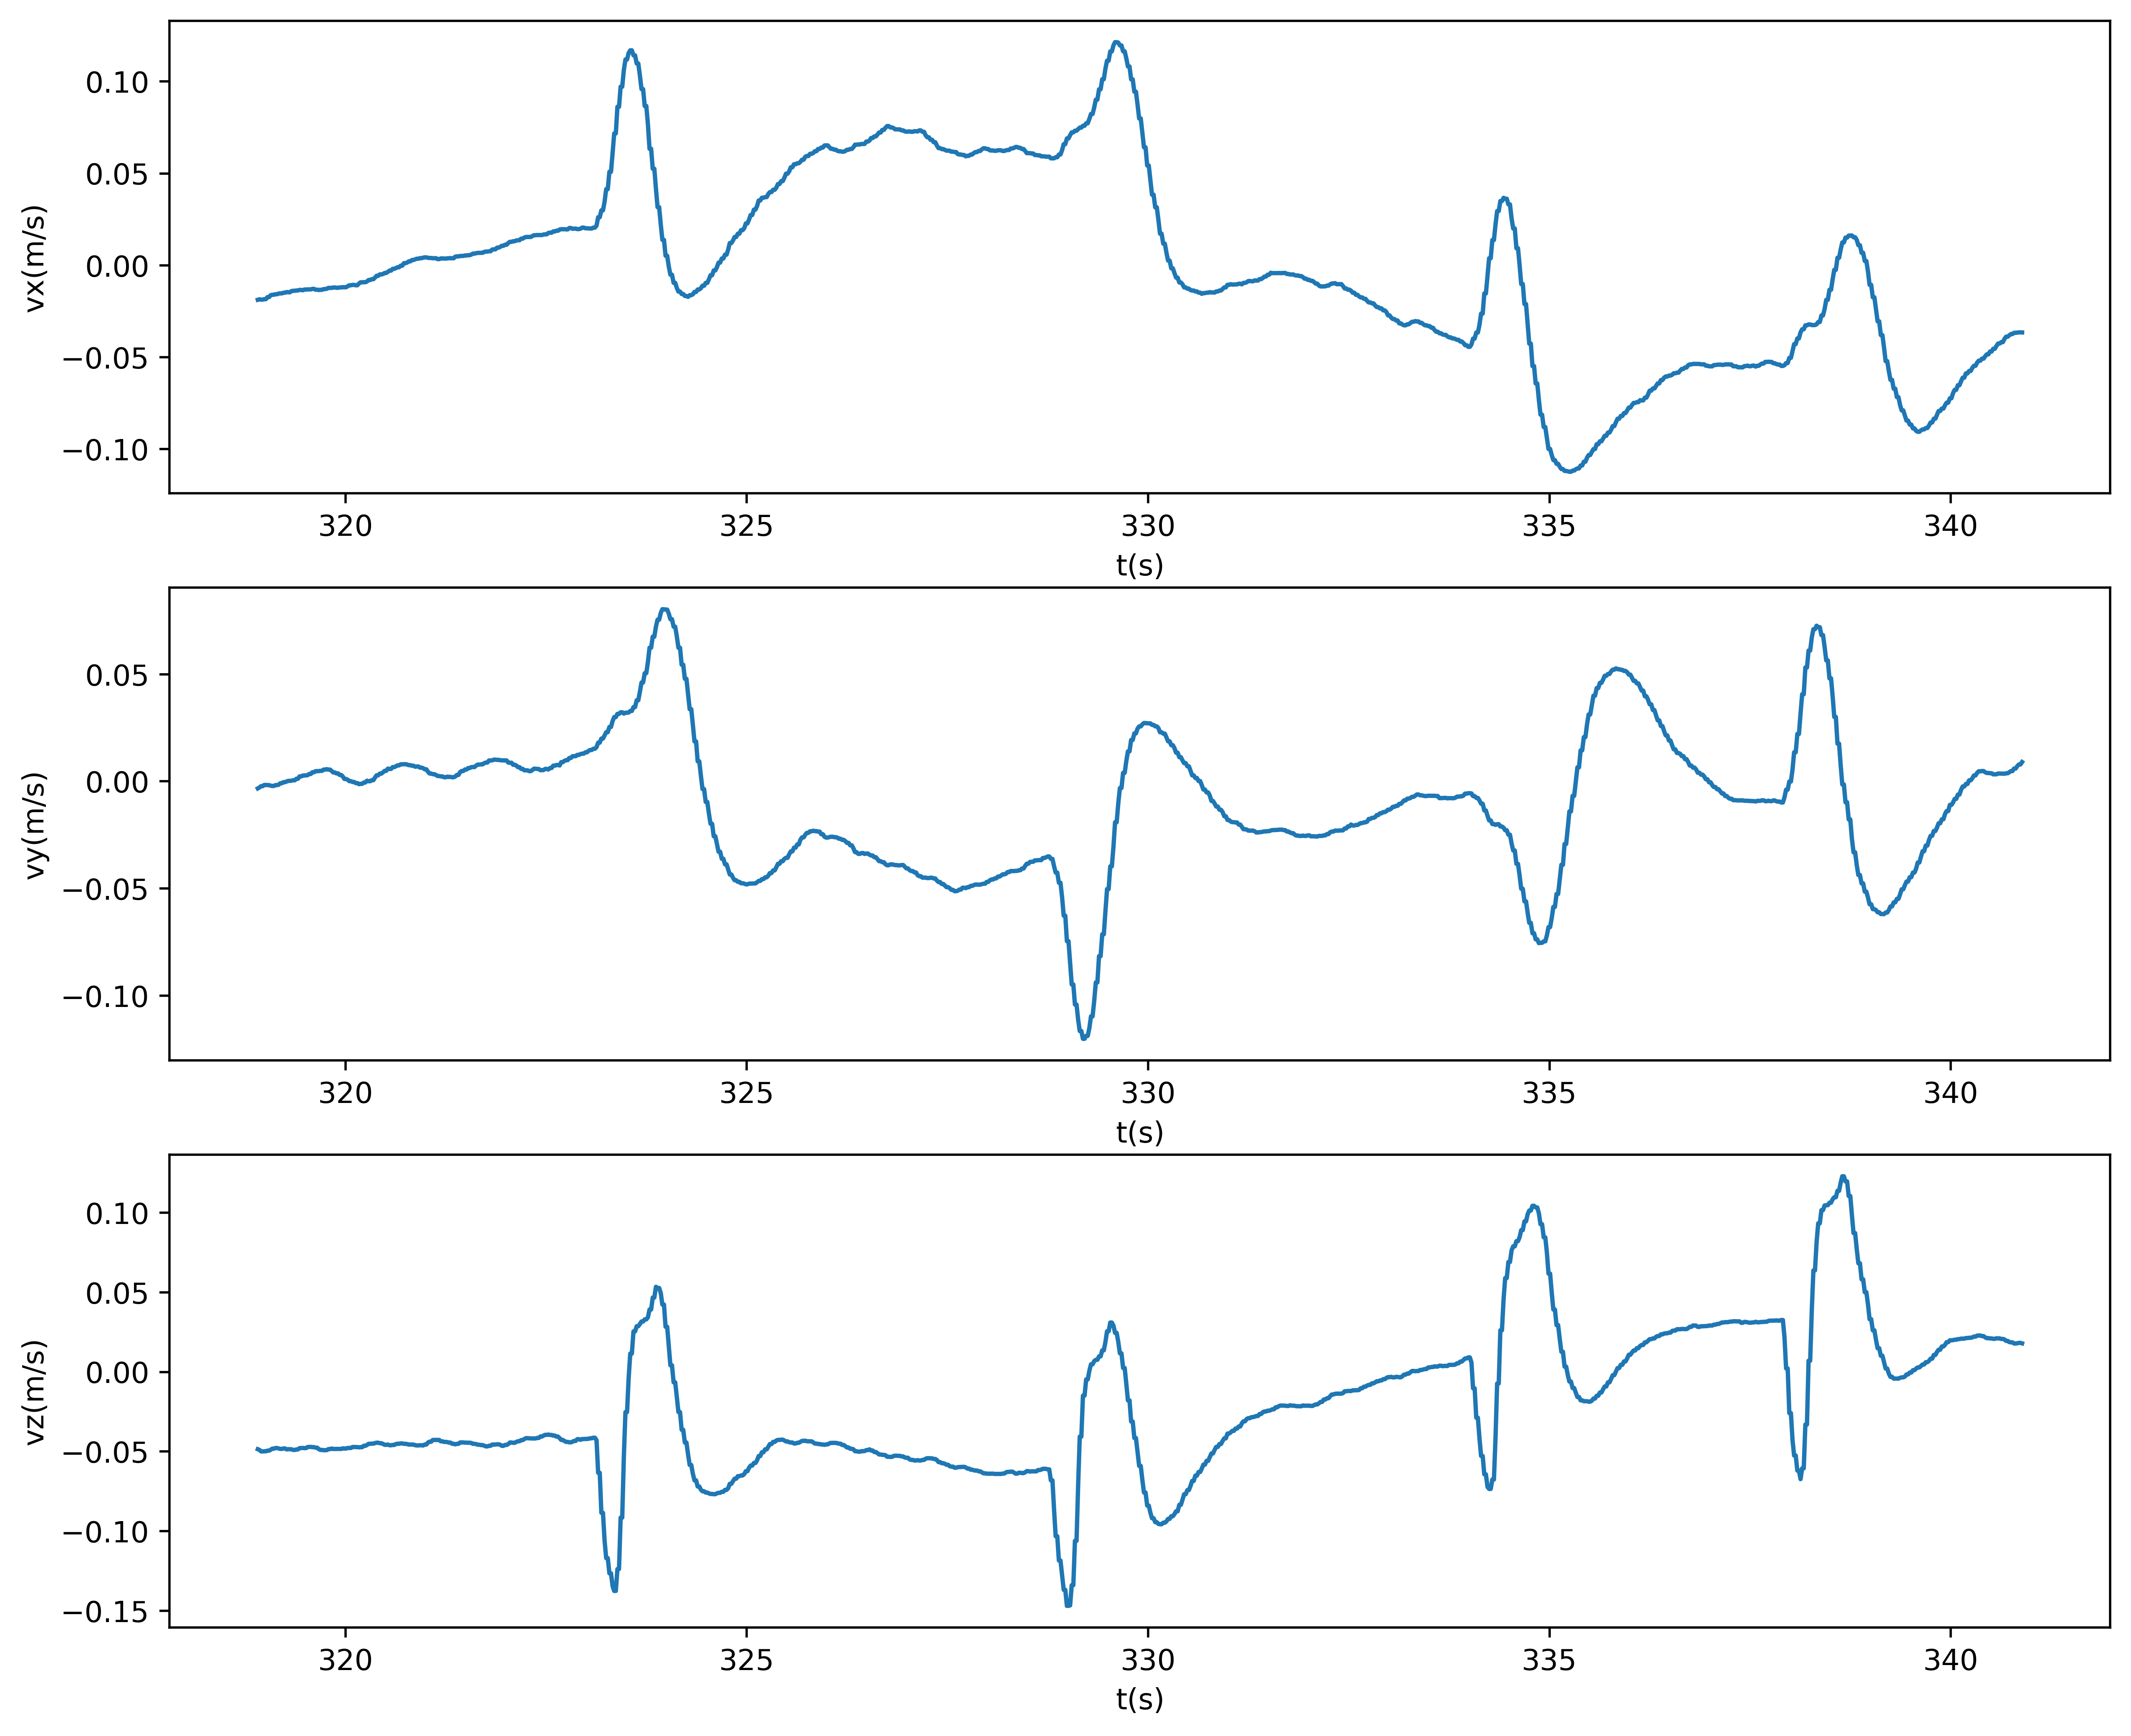

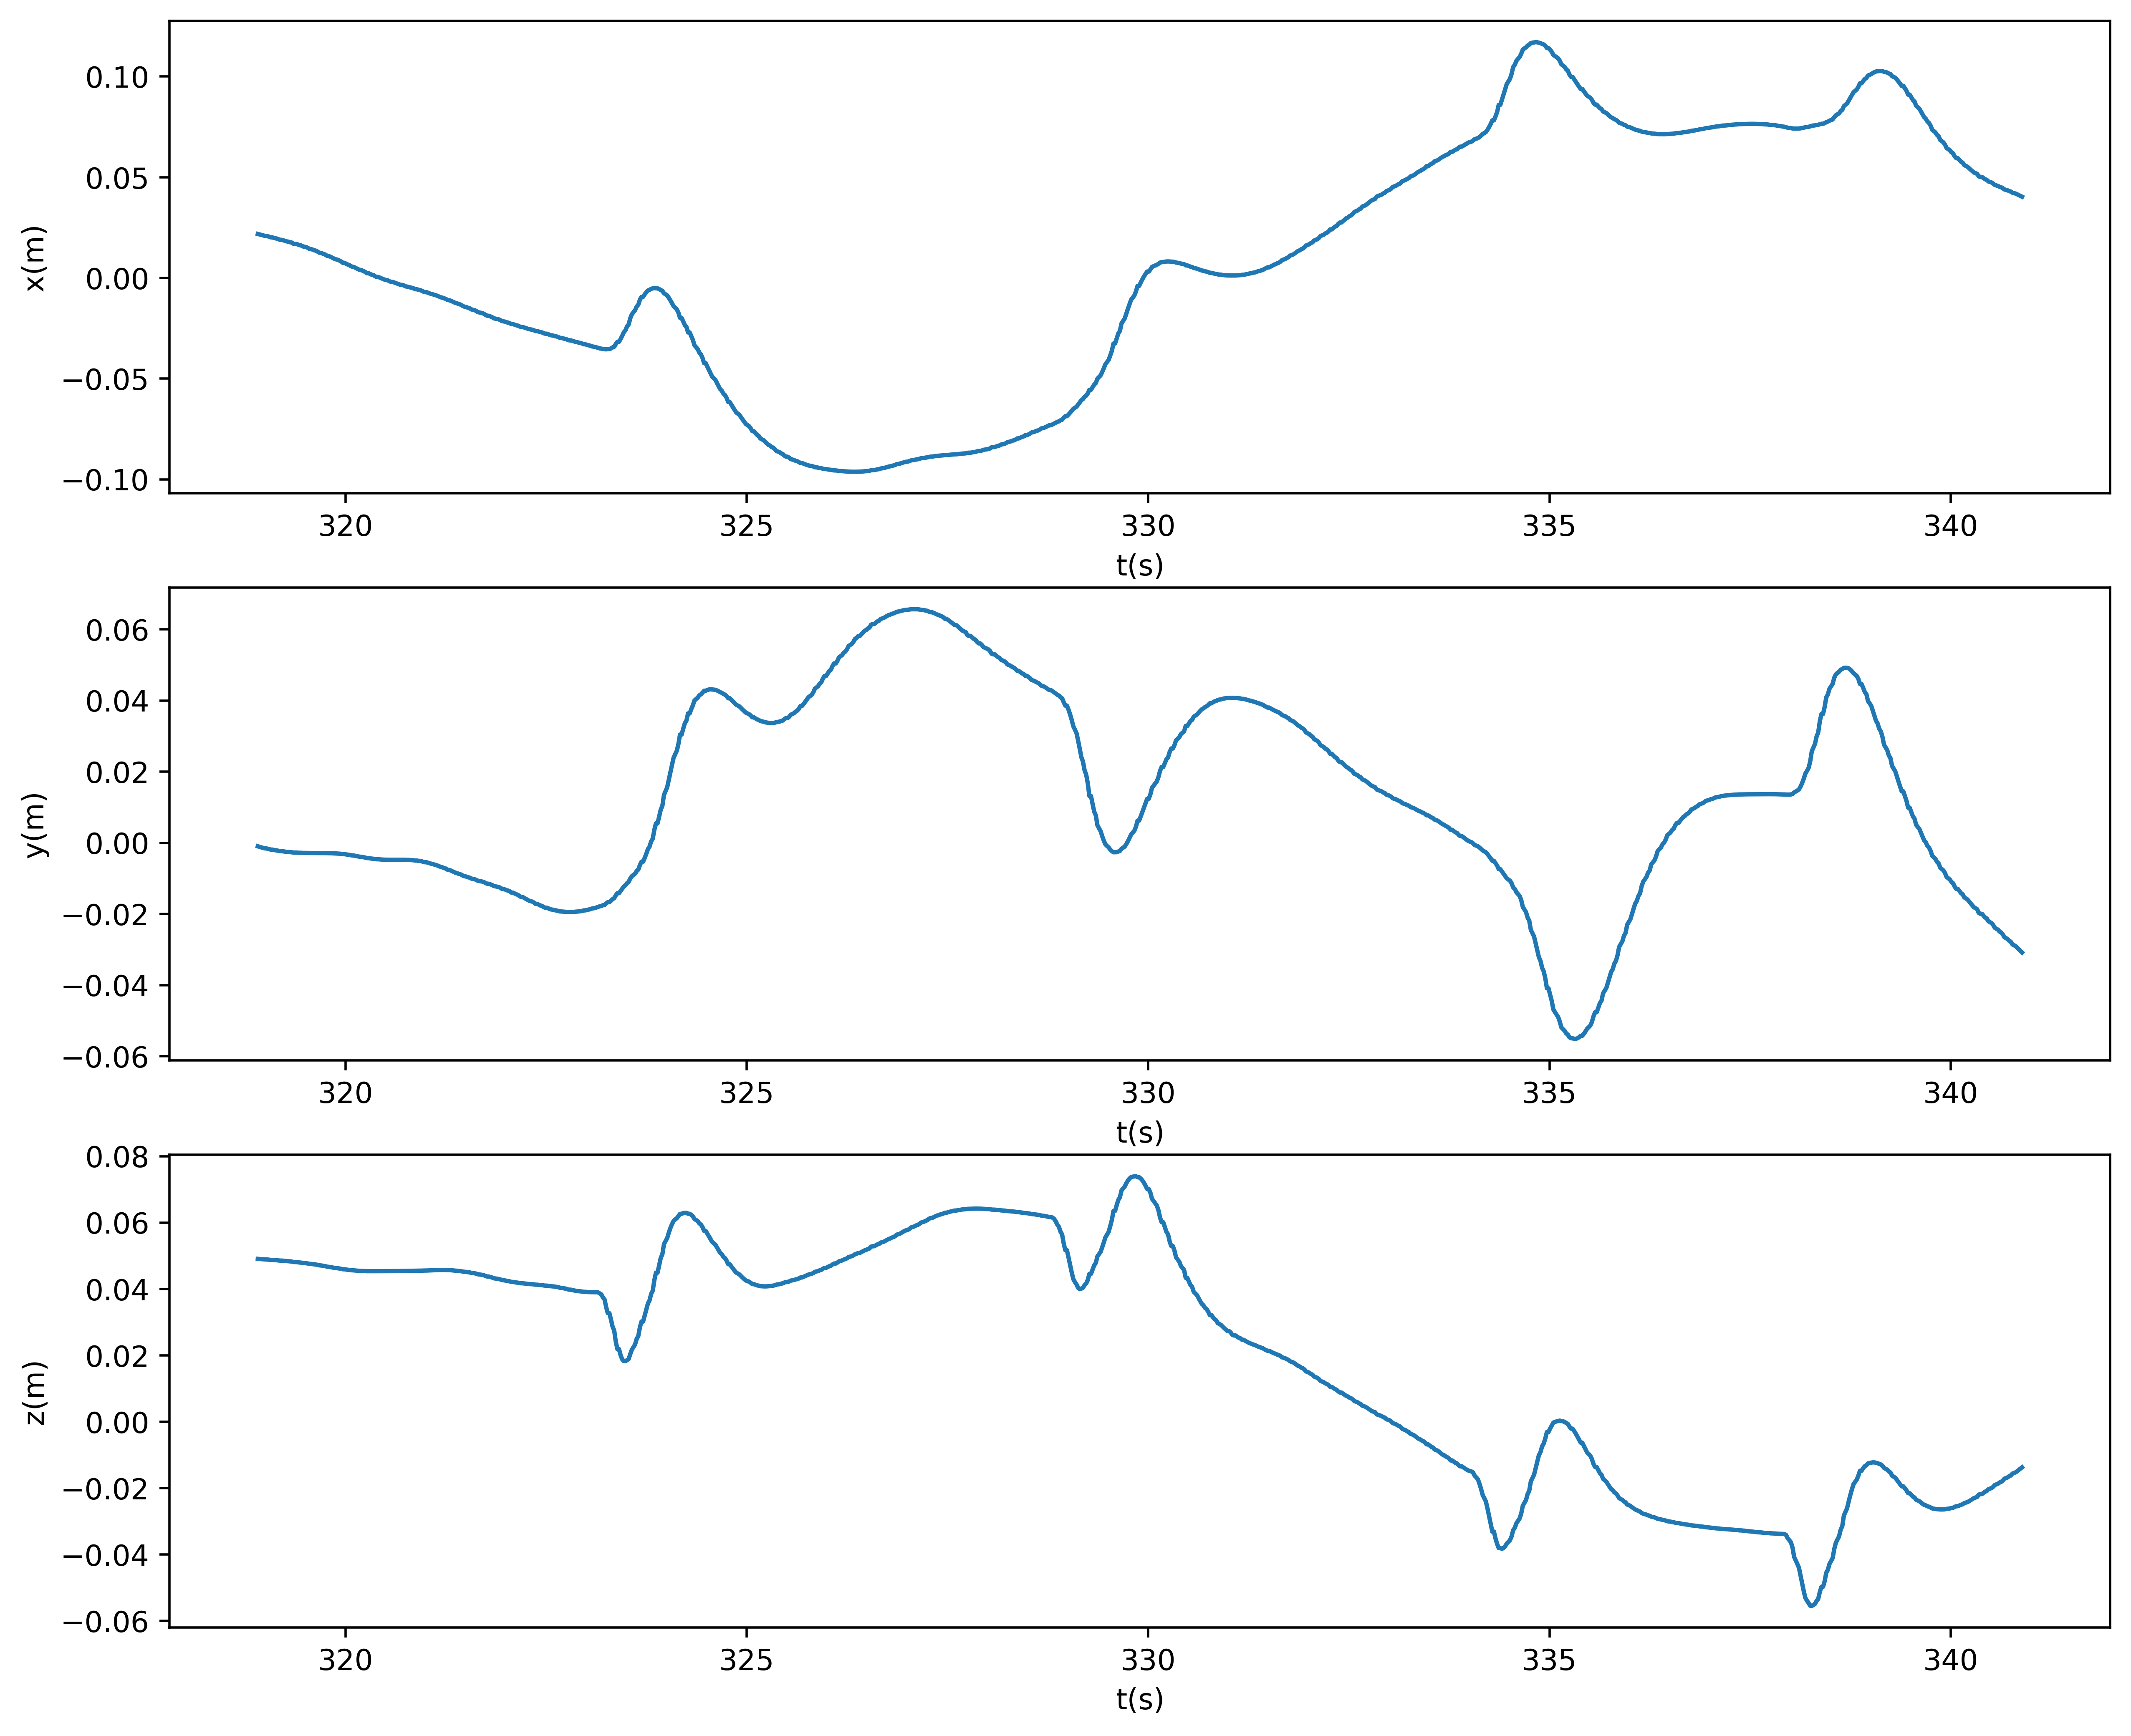

In [5]:
startIdx = 0
endIdx = 1100
plt.figure(6, figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['velocity_error.x'][startIdx:endIdx])
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['velocity_error.y'][startIdx:endIdx])
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['velocity_error.z'][startIdx:endIdx])
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')

plt.figure(7, figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['position_error.x'][startIdx:endIdx])
plt.ylabel('x(m)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['position_error.y'][startIdx:endIdx])
plt.ylabel('y(m)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["position_error.z"][startIdx:endIdx])
plt.ylabel('z(m)')
plt.xlabel('t(s)')

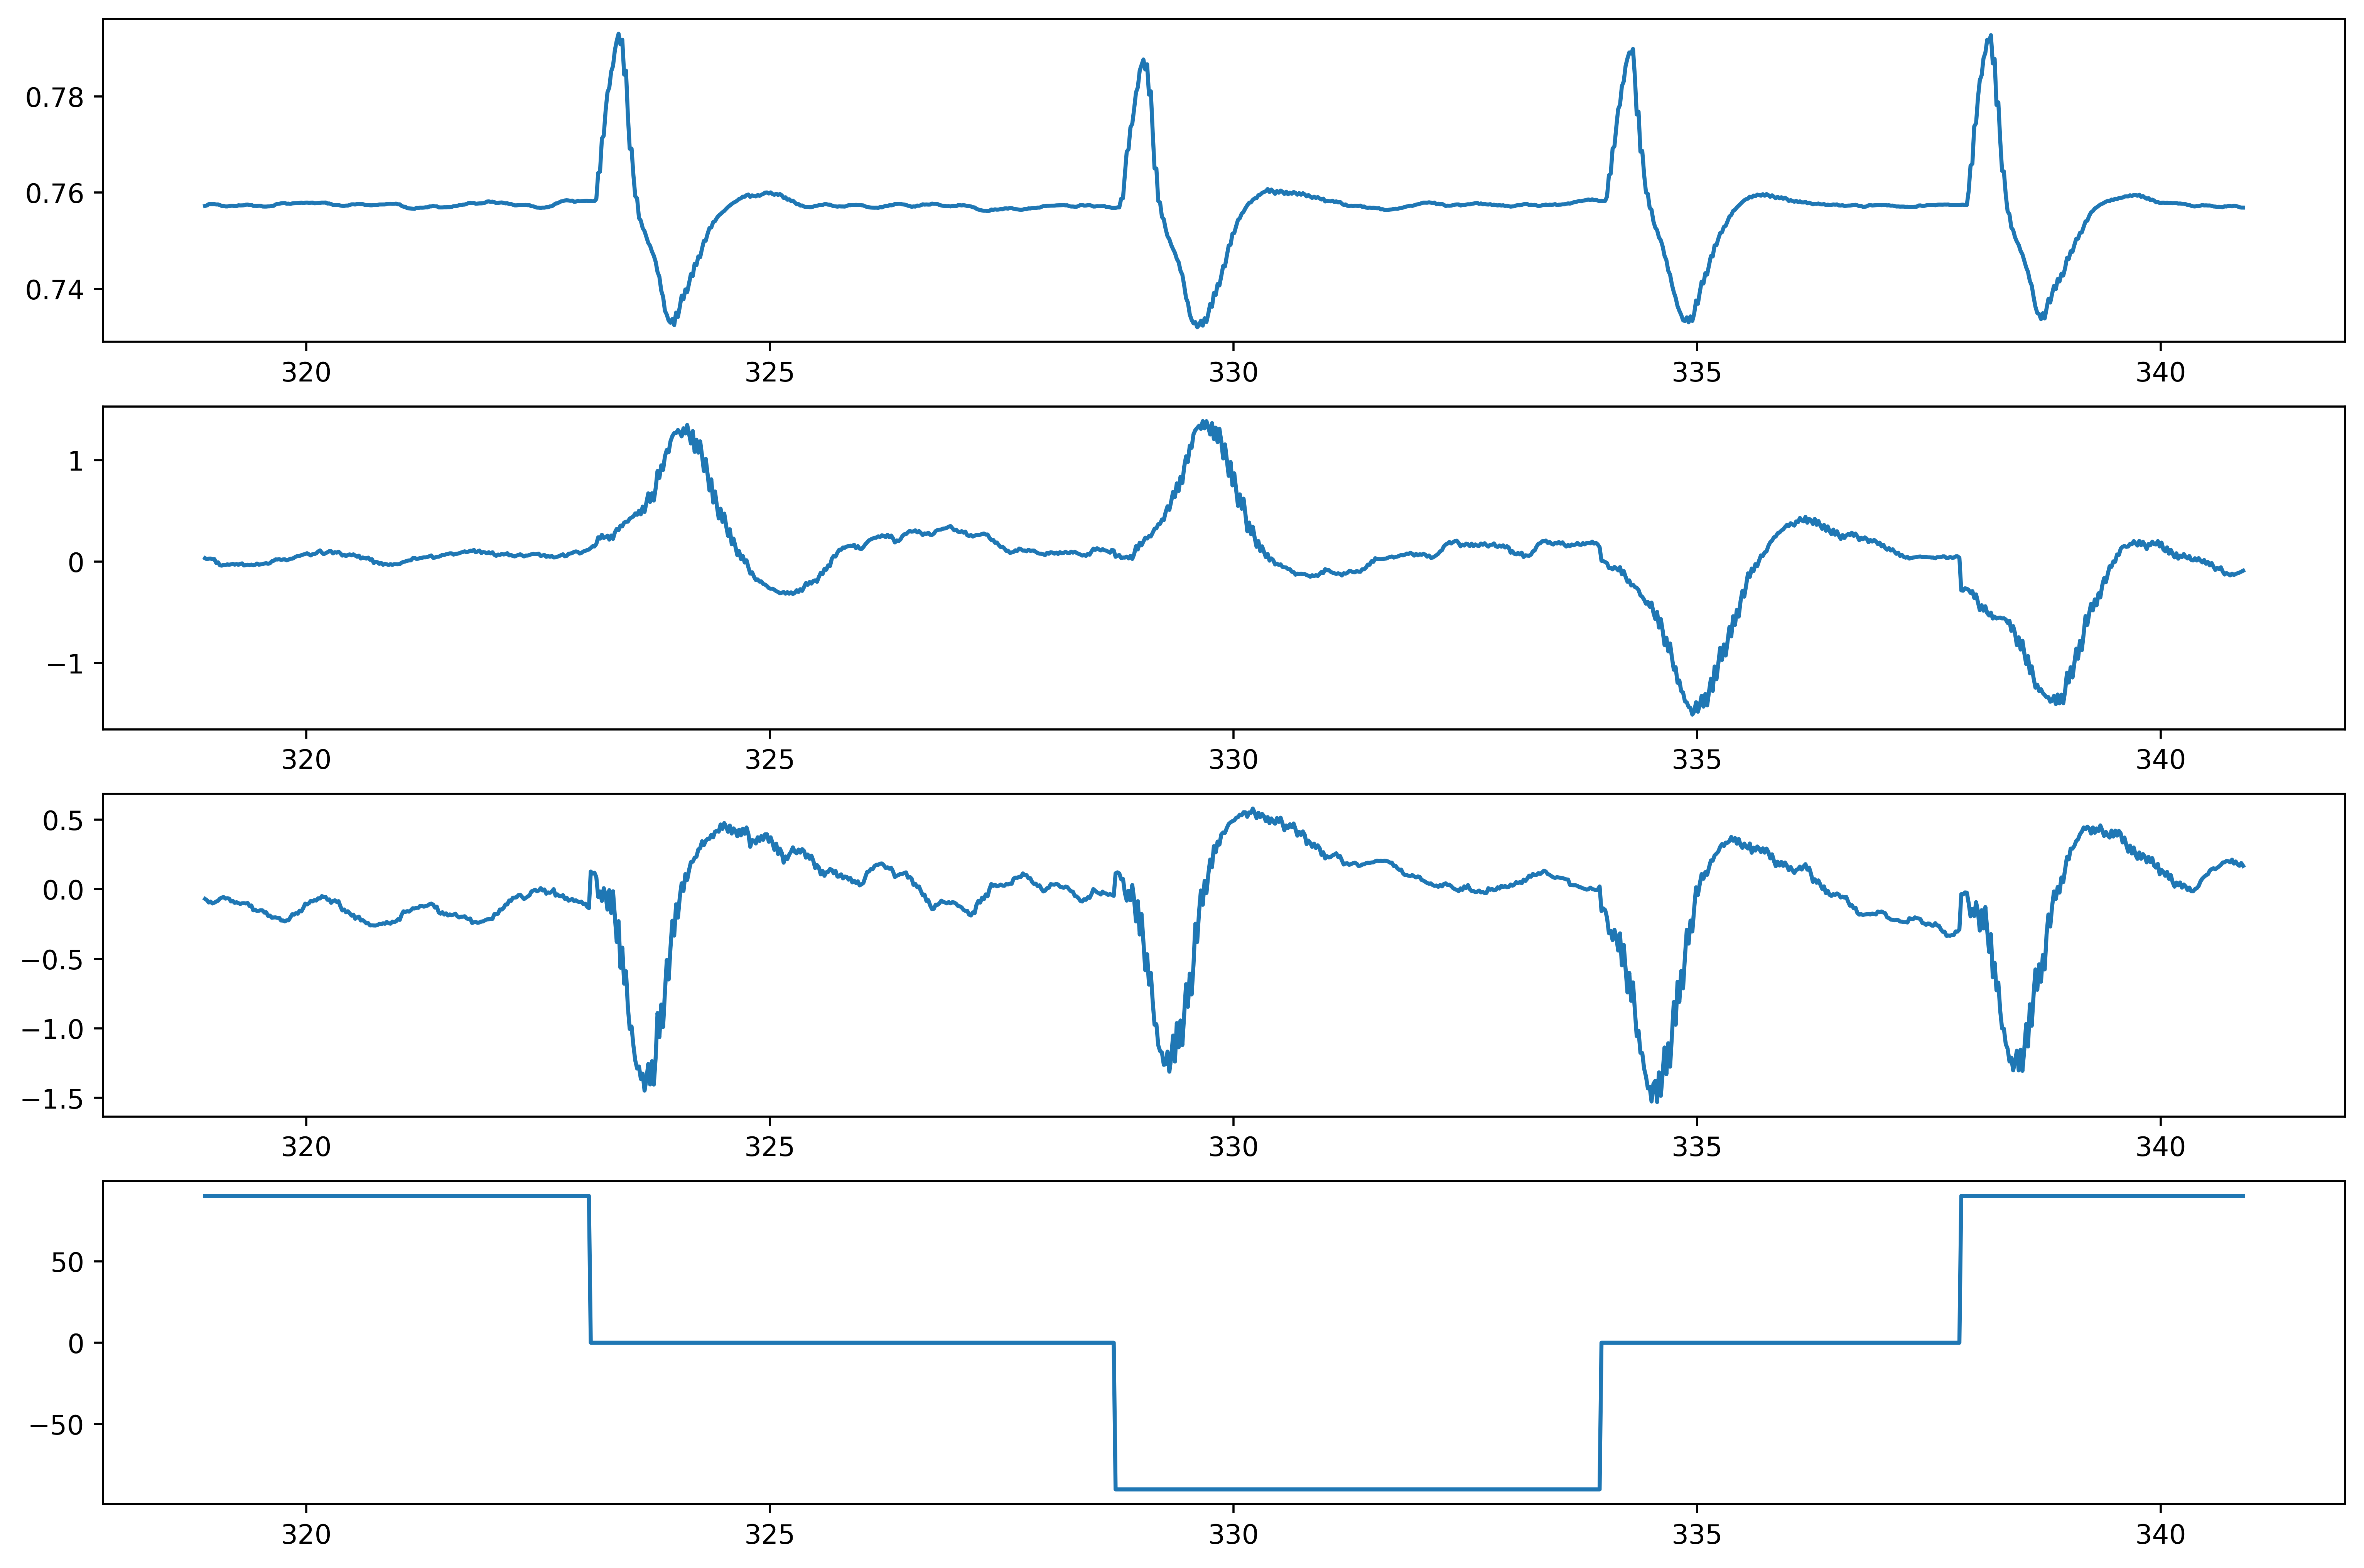

In [6]:
startIdx = 0
endIdx = 1100
plt.figure(figsize=(15,10), dpi= 500)
plt.subplot(411)
plt.plot(loggings["setpoint"]["processed_time"][startIdx:endIdx], loggings["setpoint"]["thrust"][startIdx:endIdx])

# process orientation
n = loggings["setpoint"]["orientation.x"].size

roll, pitch, yaw = ut.QuaT2EulerAngles(loggings["setpoint"]["orientation.w"],
                    loggings["setpoint"]["orientation.x"],
                    loggings["setpoint"]["orientation.y"],
                    loggings["setpoint"]["orientation.z"])

plt.subplot(412)
plt.plot(loggings["setpoint"]["processed_time"][startIdx:endIdx], roll[startIdx:endIdx])
plt.subplot(413)
plt.plot(loggings["setpoint"]["processed_time"][startIdx:endIdx], pitch[startIdx:endIdx])
plt.subplot(414)
plt.plot(loggings["setpoint"]["processed_time"][startIdx:endIdx], yaw[startIdx:endIdx])

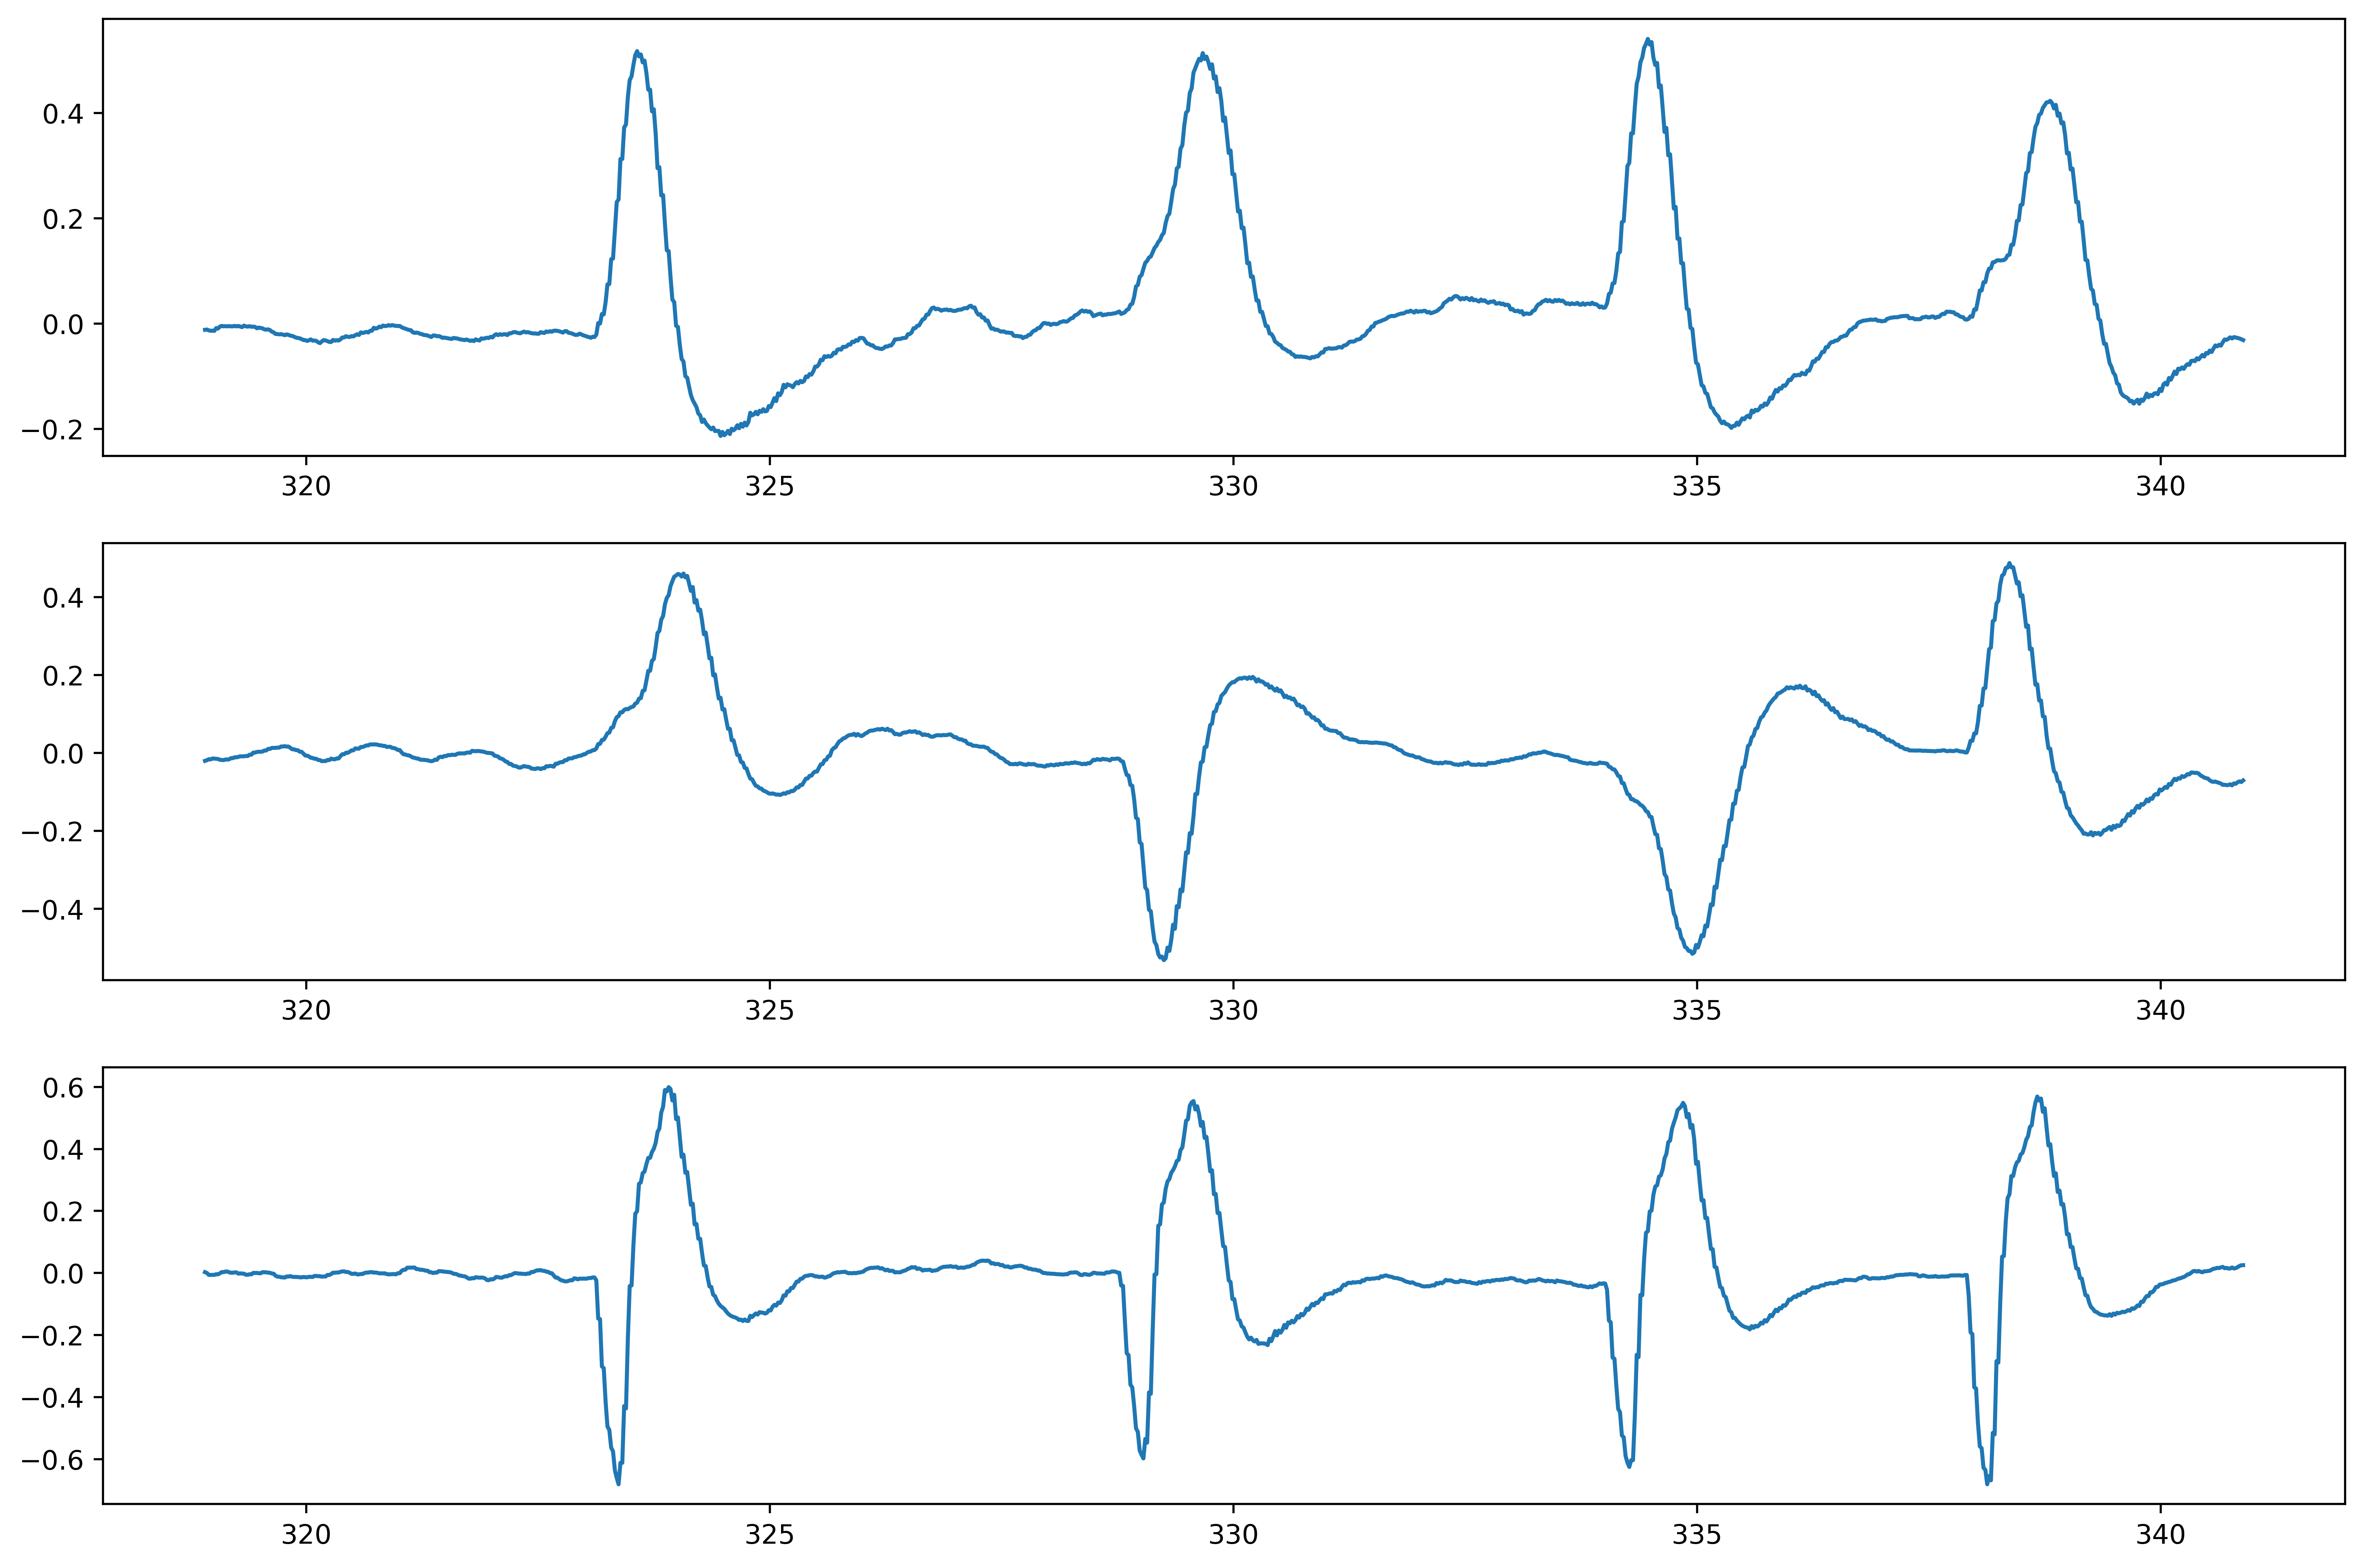

In [7]:
startIdx = 0
endIdx = 1100
plt.figure(figsize=(15,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["feedback.x"][startIdx:endIdx])

plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["feedback.y"][startIdx:endIdx])

plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["feedback.z"][startIdx:endIdx])

Text(0.5, 0, 't(s)')

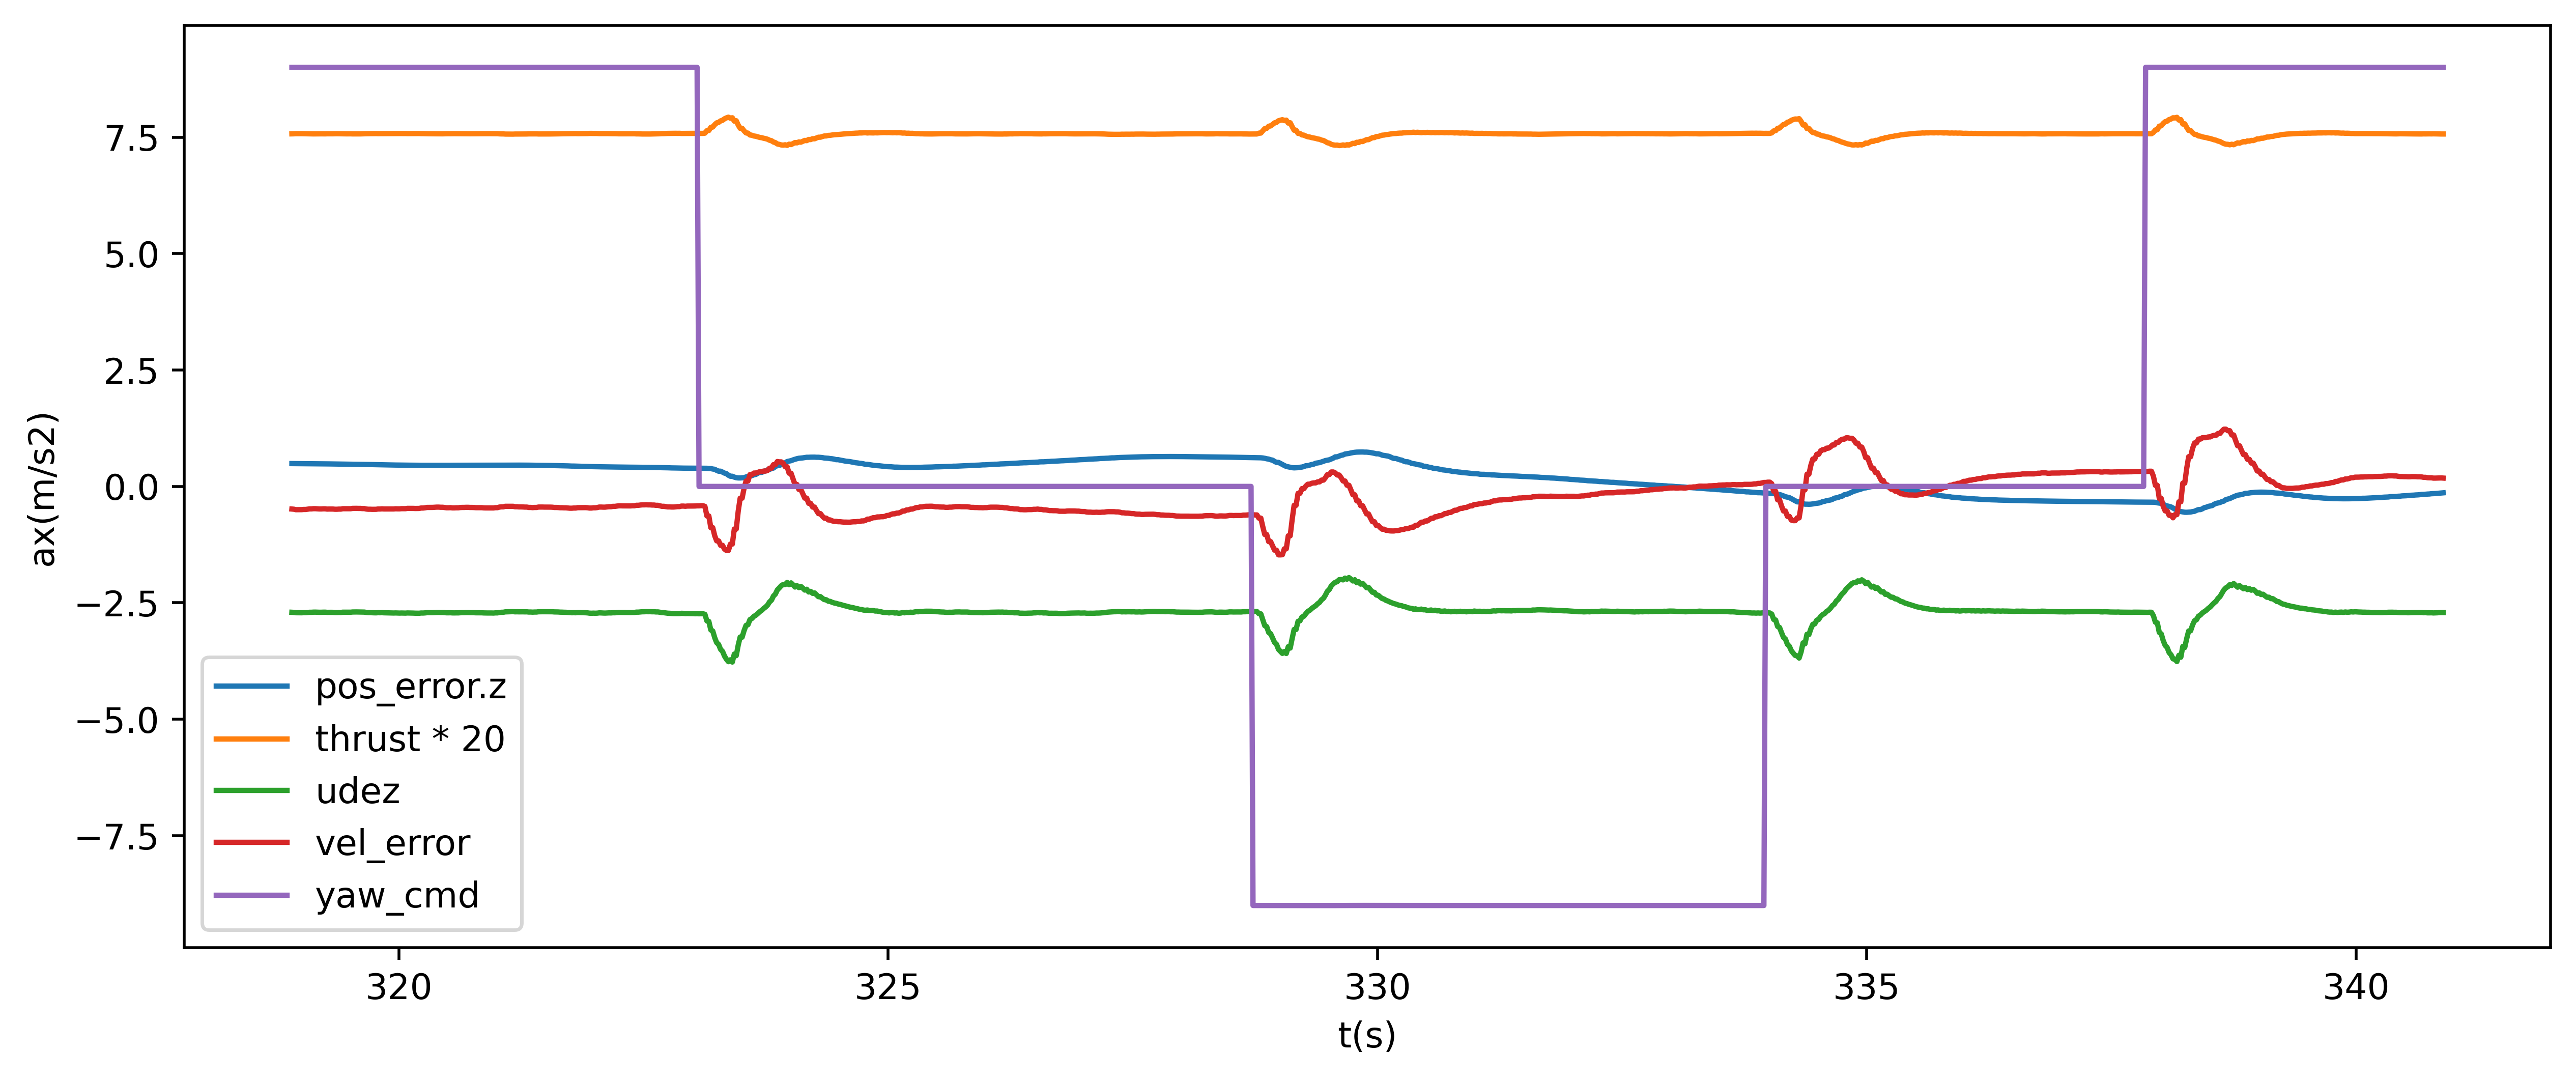

In [8]:
startIdx = 0
endIdx = 1100

plt.figure(figsize=(12,16), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], 10 * loggings["output"]["position_error.z"][startIdx:endIdx])
plt.plot(loggings["setpoint"]["processed_time"][startIdx:endIdx], 10* loggings["setpoint"]["thrust"][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.z'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], 10 * loggings["output"]['velocity_error.z'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], 0.1 * np.asarray(yaw[startIdx:endIdx]))
plt.legend(['pos_error.z', 'thrust * 20', 'udez', 'vel_error', 'yaw_cmd']) 

plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
    #    r = Rotation.from_quat([x, y, z, w])
    #     euler = r.as_euler('xyz', degrees=True)


Text(0.5, 0, 't(s)')

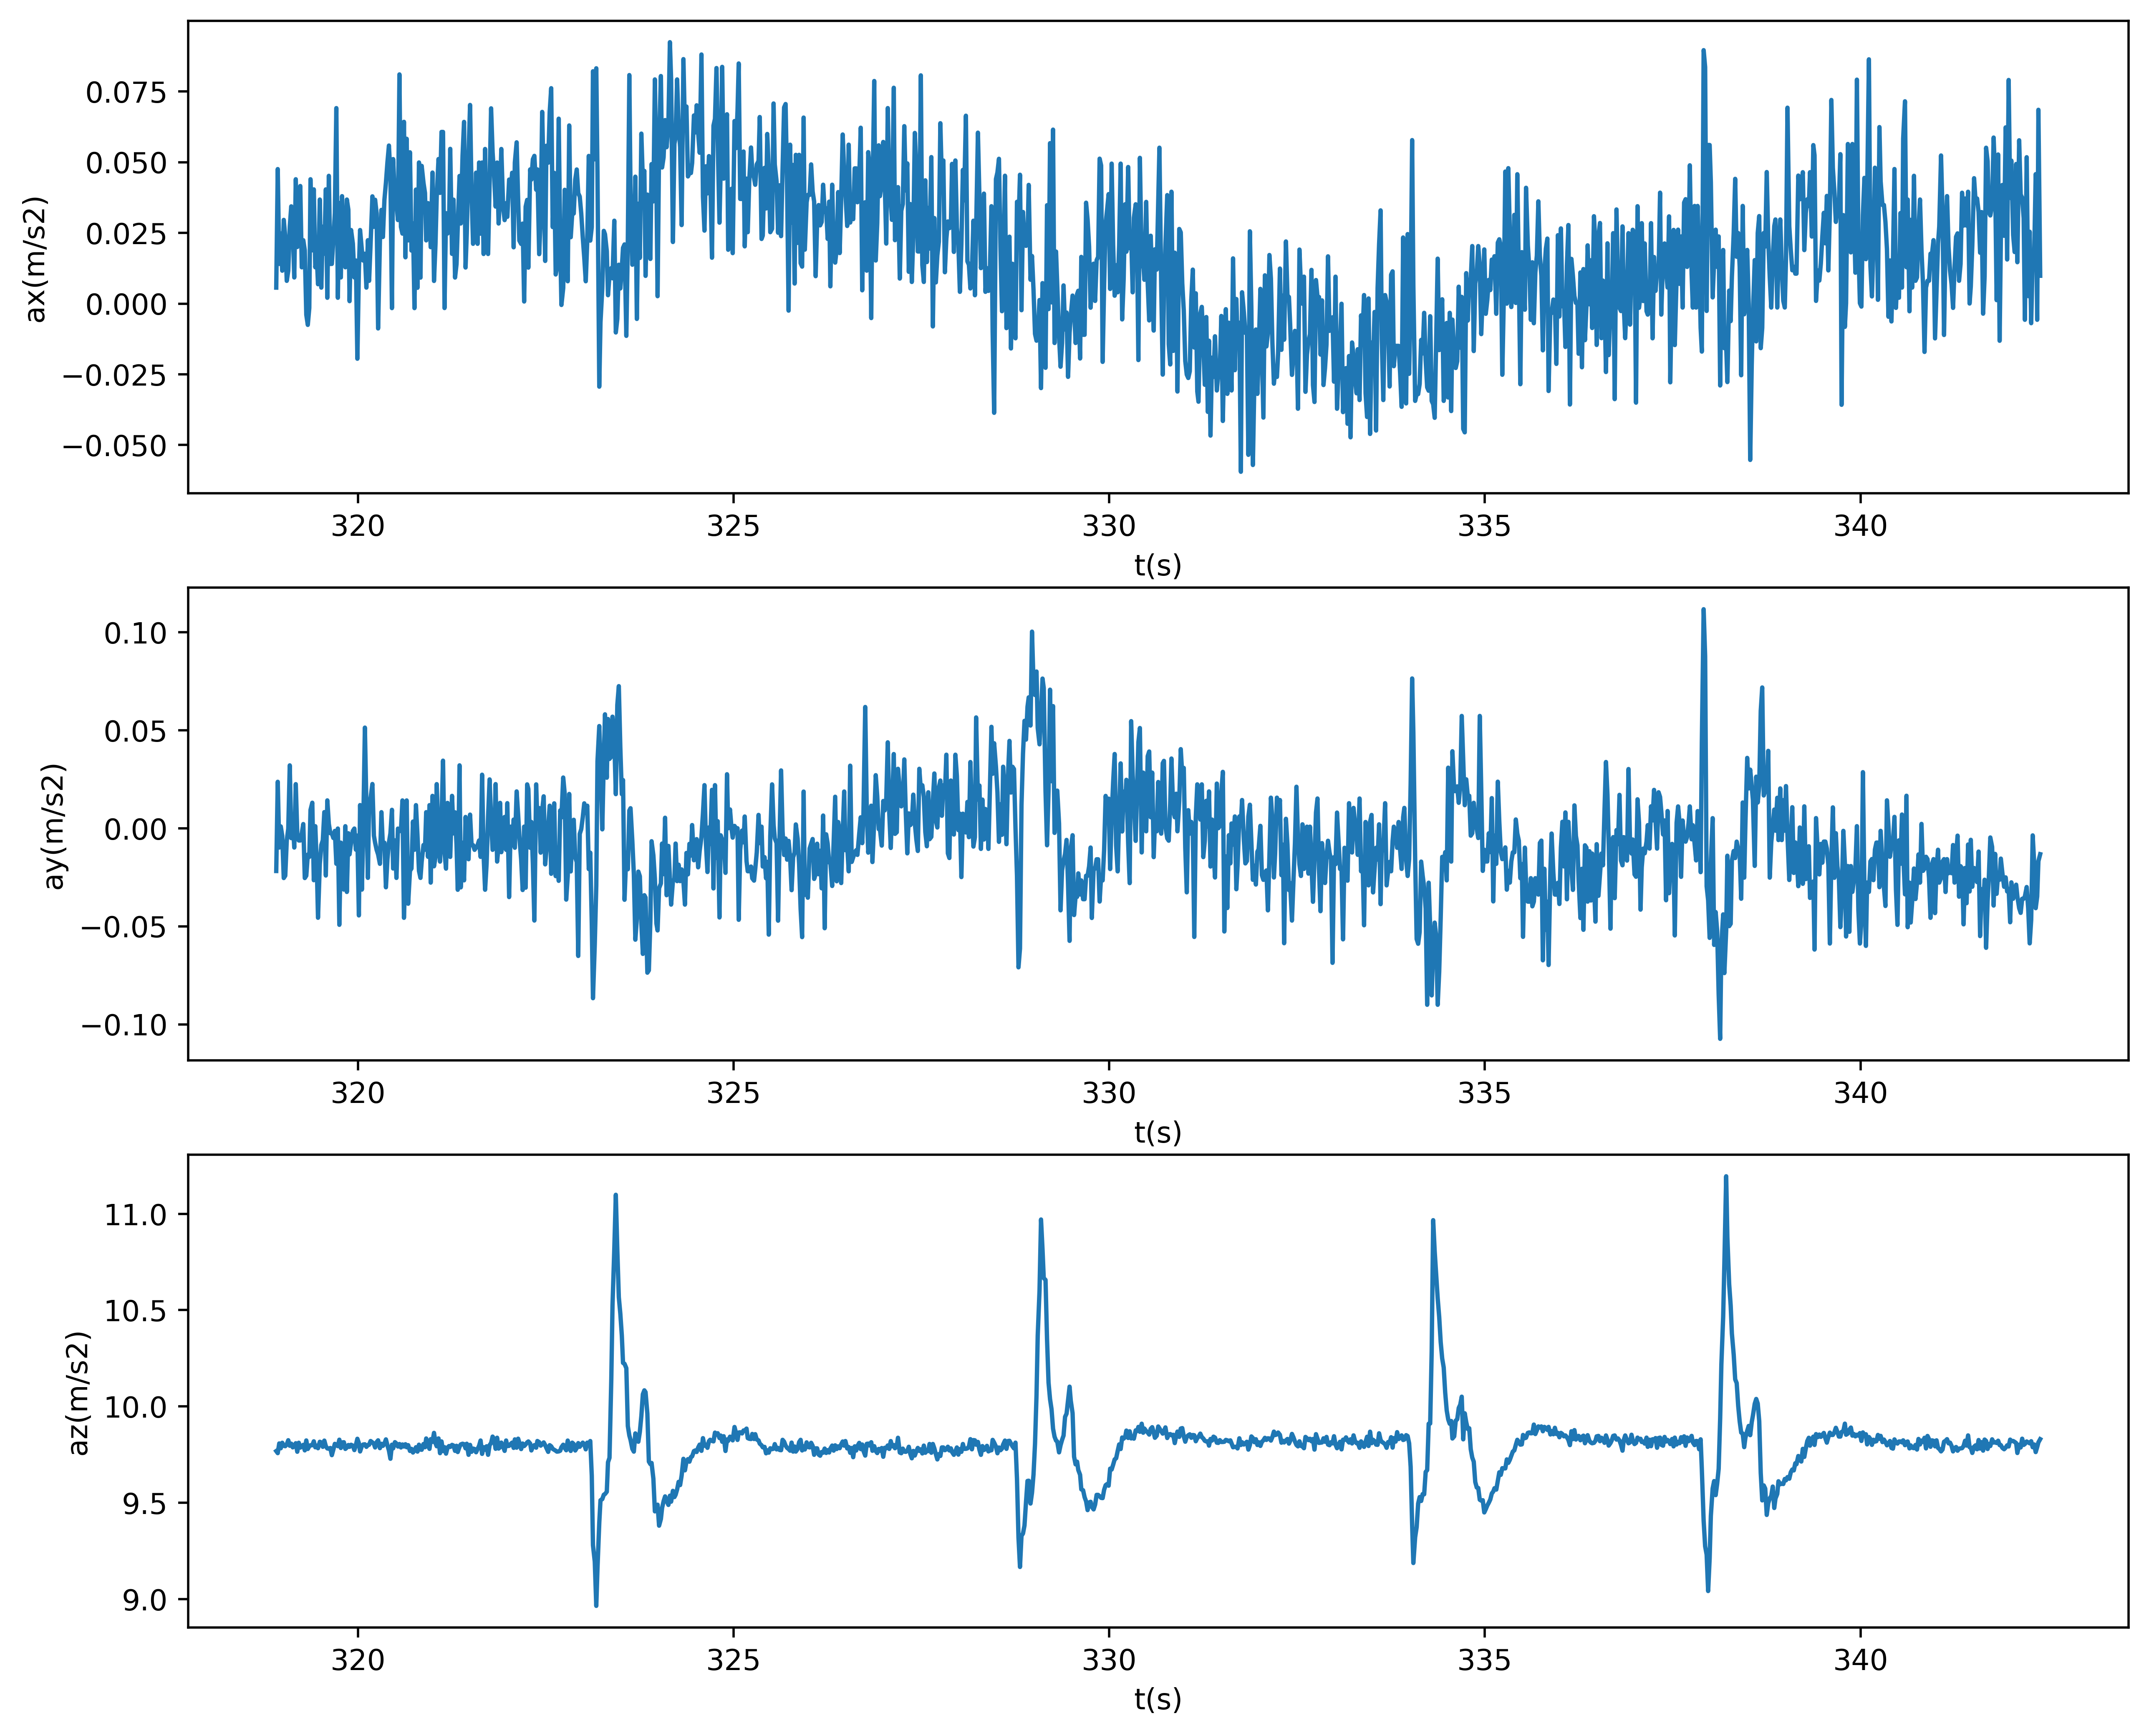

In [9]:
startIdx = 0
endIdx = 9000

plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.x"][startIdx:endIdx])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.y"][startIdx:endIdx])
plt.ylabel('ay(m/s2)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.z"][startIdx:endIdx])
plt.ylabel('az(m/s2)')
plt.xlabel('t(s)')
